In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
cat4 = cv2.imread("C:/Users/PAWAS/Desktop/computerVisionPractice/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages/Cat/4.jpg")

In [4]:
type(cat4)

numpy.ndarray

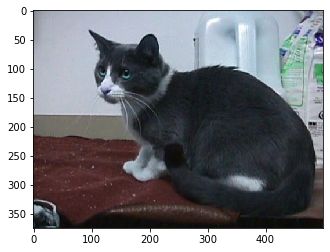

In [5]:
plt.imshow(cat4)

In [6]:
dog2 = cv2.imread("C:/Users/PAWAS/Desktop/computerVisionPractice/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages/Dog/2.jpg")

In [7]:
dog2.shape

(199, 188, 3)

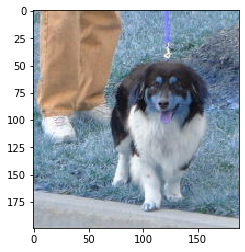

In [8]:
plt.imshow(dog2)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
Image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                              )

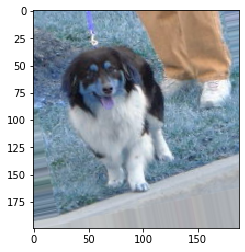

In [12]:
plt.imshow(Image_gen.random_transform(dog2))

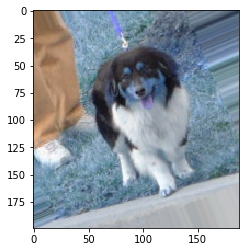

In [13]:
plt.imshow(Image_gen.random_transform(dog2))

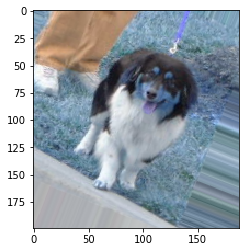

In [14]:
plt.imshow(Image_gen.random_transform(dog2))

In [15]:
import split_folders

In [18]:
split_folders.ratio('C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages',
                    output = "C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2",
                    seed = None,
                    ratio = (.8, .1, .1))

Copying files: 25002 files [15:29, 26.89 files/s]


In [23]:
image_shape = (150, 150, 3)

In [22]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [28]:
batch_size = 16

In [45]:
train_image_gen = Image_gen.flow_from_directory('C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2/train',
                                               target_size = image_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 19997 images belonging to 2 classes.


In [47]:
test_image_gen = Image_gen.flow_from_directory('C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2/test',
                                               target_size = image_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary') 

Found 2502 images belonging to 2 classes.


In [48]:
valid_image_gen= Image_gen.flow_from_directory('C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2/val',
                                               target_size = image_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 2500 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [38]:
import warnings

In [39]:
warnings.filterwarnings('ignore')

In [49]:
result = model.fit_generator(train_image_gen,
                            epochs = 100,
                            steps_per_epoch = 150,
                             validation_data = test_image_gen,
                             validation_steps = 12
                            )

Epoch 1/100
150/150 [==============================] - 124s 824ms/step - loss: 0.6181 - accuracy: 0.6658 - val_loss: 0.5193 - val_accuracy: 0.6510
Epoch 2/100
150/150 [==============================] - 125s 832ms/step - loss: 0.6023 - accuracy: 0.6850 - val_loss: 0.7263 - val_accuracy: 0.6875
Epoch 3/100
150/150 [==============================] - 131s 876ms/step - loss: 0.5952 - accuracy: 0.6729 - val_loss: 0.6018 - val_accuracy: 0.7188
Epoch 4/100
150/150 [==============================] - 123s 819ms/step - loss: 0.6099 - accuracy: 0.6896 - val_loss: 0.5474 - val_accuracy: 0.7135
Epoch 5/100
150/150 [==============================] - 124s 825ms/step - loss: 0.5623 - accuracy: 0.7138 - val_loss: 0.4719 - val_accuracy: 0.7344
Epoch 6/100
150/150 [==============================] - 141s 940ms/step - loss: 0.5888 - accuracy: 0.6892 - val_loss: 0.4560 - val_accuracy: 0.7604
Epoch 7/100
150/150 [==============================] - 129s 860ms/step - loss: 0.5738 - accuracy: 0.7125 - val_loss: 0

In [51]:
result.history['accuracy']

[0.66583335,
 0.685,
 0.6729245,
 0.68958336,
 0.71375,
 0.68916667,
 0.7125,
 0.73125,
 0.7366667,
 0.71958333,
 0.72298706,
 0.7341667,
 0.73625,
 0.74916667,
 0.74333334,
 0.75166667,
 0.75708336,
 0.7579167,
 0.7704167,
 0.7495833,
 0.7475,
 0.76095116,
 0.7554167,
 0.7604167,
 0.75416666,
 0.7642887,
 0.78791666,
 0.76416665,
 0.77,
 0.7808333,
 0.7775,
 0.78541666,
 0.78375,
 0.77875,
 0.785,
 0.7775,
 0.77375,
 0.79333335,
 0.7841667,
 0.7884856,
 0.81041664,
 0.79625,
 0.80892783,
 0.78375,
 0.7945833,
 0.8183333,
 0.79625,
 0.81,
 0.805,
 0.80583334,
 0.80583334,
 0.80333334,
 0.81375,
 0.80100125,
 0.79625,
 0.80375,
 0.8179167,
 0.81625,
 0.81958336,
 0.81708336,
 0.8060075,
 0.82166666,
 0.81958336,
 0.80583334,
 0.82416666,
 0.80125,
 0.8208333,
 0.82666665,
 0.80625,
 0.82875,
 0.8206091,
 0.8258333,
 0.82458335,
 0.835,
 0.81583333,
 0.82958335,
 0.81083333,
 0.84625,
 0.81958336,
 0.83708334,
 0.82208335,
 0.8258333,
 0.81810594,
 0.82311225,
 0.82,
 0.8283333,
 0.84375

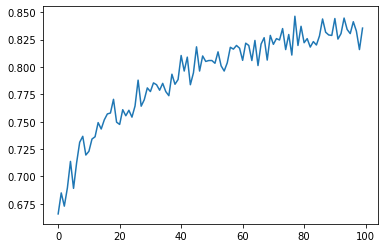

In [52]:
plt.plot(result.history['accuracy'])

In [53]:
model.save('cat_dog_100epochs.h5')

In [54]:
import numpy as np

In [55]:
from keras.preprocessing import image

In [57]:
dog_file = 'C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2/train/Dog/58.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [58]:
prediction_prob = model.predict(dog_img)

In [59]:
print(prediction_prob)

[[0.98706996]]


In [77]:
#on test set
img_size = 150
import os
import tensorflow as tf

In [106]:
batch_holder = np.zeros((20, img_size, img_size, 3))
img_dir = 'C:/deepLearningKagglecats and dogs/kagglecatsanddogs_3367a/PetImages2/test/test_both'

In [107]:
for i, img in enumerate(os.listdir(img_dir)):
    img = image.load_img(os.path.join(img_dir,img),target_size = (img_size, img_size))

    batch_holder[i:] = img
    
results = model.predict_classes(batch_holder)



In [110]:
def label(results):
    if results == [0]:
        label = 'Cat'
    elif results == [1]:
        label = 'Dog'
    return label
print(label)

<function label at 0x000001FB0AAE91F8>


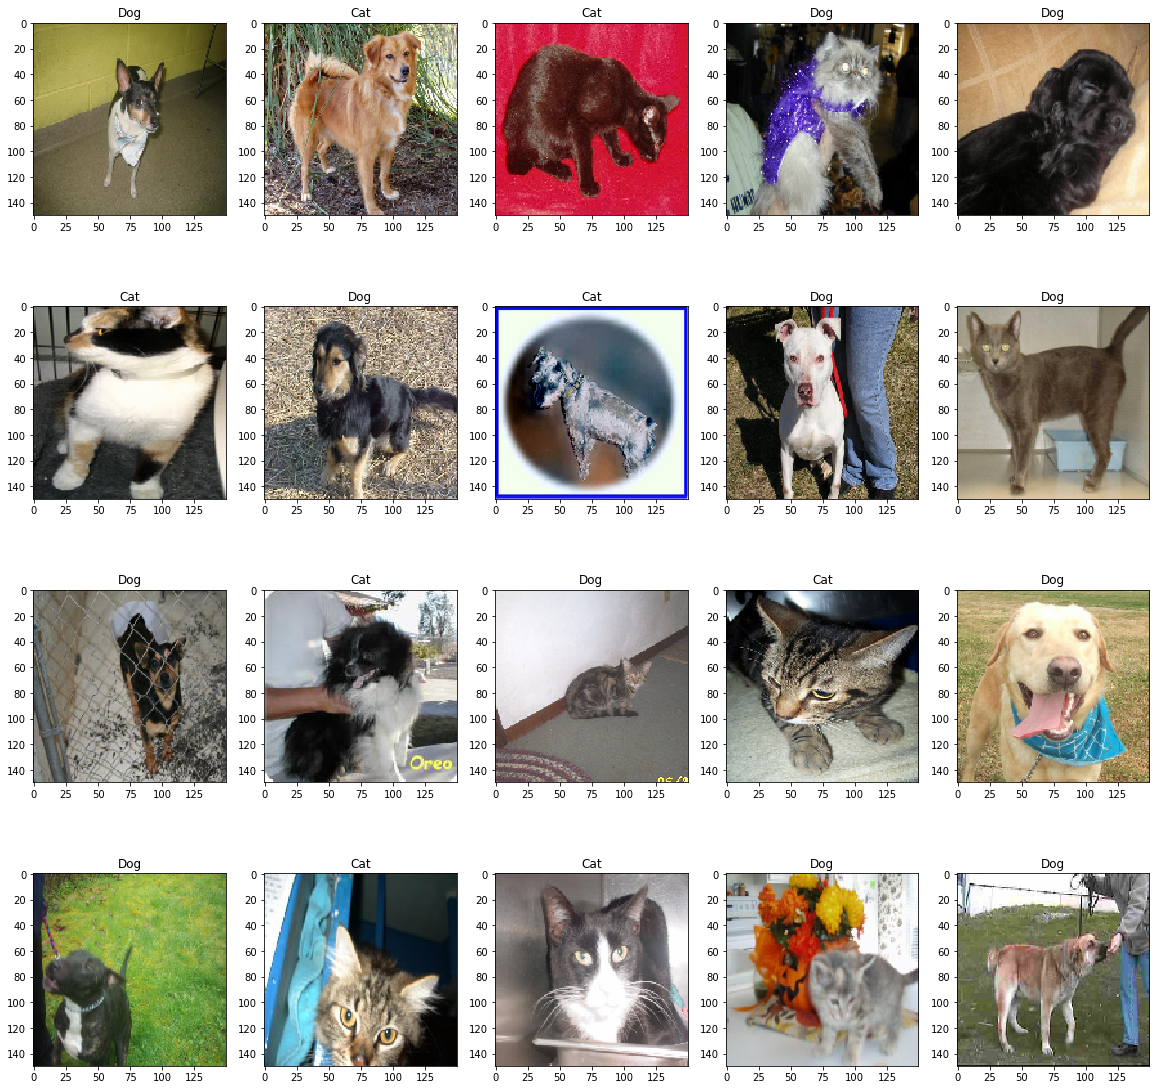

In [111]:
fig = plt.figure(figsize = (20,20))

for i, img in enumerate(batch_holder):
    fig.add_subplot(4,5, i+1)
    plt.title(label(results[i][0]))
    plt.imshow(img/256)
    
plt.show()